In [1]:
%pip install joblib

In [2]:
!git clone https://github.com/cloner174/mr.Sina


Cloning into 'mr.Sina'...
remote: Enumerating objects: 266, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 266 (delta 1), reused 5 (delta 1), pack-reused 259
Receiving objects: 100% (266/266), 118.95 MiB | 17.56 MiB/s, done.
Resolving deltas: 100% (89/89), done.
Updating files: 100% (120/120), done.


In [3]:
%cd mr.Sina

/content/mr.Sina


In [4]:
import networkx as nx
import pandas as pd
import numpy as np
import joblib
import os

In [5]:
# main path to models folder :

model_path = 'models/'

In [6]:
# Loading the best model : # NOT RECOMMENDED #

# This model not trained on just inbetweeen links #

model_name = 'clf_model.joblib'
model_to_be_load = os.path.join(model_path,model_name)
model = joblib.load(model_to_be_load)

In [6]:
# Loading the best model with trained on more states of events:

# Recommended :

model_name = 'clf_model2.joblib'

model_to_be_load = os.path.join(model_path,model_name)
model = joblib.load(model_to_be_load)

In [7]:
print(model)

RandomForestClassifier(max_depth=100, min_samples_split=50, random_state=64,
                       verbose=2)


In [10]:
#publisher_nodes_path = 'input/publishers.csv'
#advertiser_nodes_path = 'input/advertisers.csv'
data_links_path = 'input/links.csv'
data_nodes_path = 'input/nodes.csv'

In [37]:
#publisher_nodes = pd.read_csv(publisher_nodes_path)
#advertiser_nodes = pd.read_csv(advertiser_nodes_path)
data_links = pd.read_csv(data_links_path)
data_nodes = pd.read_csv(data_nodes_path)

In [39]:
# Loading data Approach 1
data = pd.read_csv( 'input/link_dataFinal.csv' , index_col=0)
print(data.shape, data_nodes.shape)
#((969395, 3), (8977, 5))
data = data.sample(frac=0.01)
nodes_list = []
sors = []
advs = []
pubs = []
for i in data['source'] :
  if i in data_nodes['id'].tolist():
    if i not in nodes_list:
      sors.append(i)
      nodes_list.append(i)
      index = data_nodes.index[data_nodes['id'] == i].tolist()[0]
      if list(data_nodes.iloc[[index]]['color'] == 'red')[0]:
        advs.append(i)
      else:
        pubs.append(i)
tar = []
for i in data['target'] :
  if i in data_nodes['id'].tolist():
    if i not in nodes_list:
      tar.append(i)
      nodes_list.append(i)
      index = data_nodes.index[data_nodes['id'] == i].tolist()[0]
      if list(data_nodes.iloc[[index]]['color'] == 'red')[0]:
        advs.append(i)
      else:
        pubs.append(i)

advs_ = list(set(advs))
pubs_ = list(set(pubs))

len(nodes_list), len(advs_), len(pubs_) #(4299, 1946)# ,تعداد کل نود ها 6245

(199981, 4) (8977, 5)


(1531, 627, 904)

In [40]:
len(advs_), len(pubs_) #(4299, 1946)

(627, 904)

In [17]:
"""
import itertools
import random

#
data_links = data_links.sample(frac=1, random_state = 64)

#
links_set = set(zip(data_links['source'], data_links['target']))

#
random.shuffle(nodes_list)
random.shuffle(nodes_list)
node_pairs = itertools.combinations(nodes_list, 2)

unlinked_pairs = []
for pair in node_pairs:
    if pair not in links_set and (pair[1], pair[0]) not in links_set:
        unlinked_pairs.append(pair)
    if len(unlinked_pairs) == 20000 :
      break
    else:
      continue

print("Pairs of nodes with no links:")
print(unlinked_pairs)
"""

Pairs of nodes with no links:
[(7593, 2572), (7593, 2225), (7593, 3141), (7568, 7276), (7568, 6326)]


In [42]:
data_links = data_links.sample(frac=1, random_state=32)

links_ = []
for i in range(data_links.shape[0]) :
    sor_ = data_links.loc[i, 'source']
    tar_ = data_links.loc[i, 'target']
    if sor_ in nodes_list and tar_ in nodes_list:
        links_.append( (sor_, tar_) )
        if len(links_) == 30000 :
            break
        else:
            continue

In [43]:
#randomly select nodes !

publisher_nodes = advs_.copy()
advertiser_nodes = pubs_.copy()
data_links = links_.copy()

In [46]:
len(publisher_nodes), len(advertiser_nodes), len(data_links)

(627, 904, 30000)

In [45]:
advertiser_nodes = set(advertiser_nodes)
publisher_nodes = set(publisher_nodes)

In [48]:
 min(publisher_nodes),max(publisher_nodes), min(advertiser_nodes), max(advertiser_nodes)

(0, 5663, 5699, 8965)

In [ ]:
#

In [129]:
advertiser_nodes_guide_map = {"Advertisers-name" : [],
                              "Advertisers-id" : []
}

publisher_nodes_guide_map = {"Publishers-name" : [] ,
                             "Publishers-id" : []
}

In [50]:
for node in advertiser_nodes:
  advertiser_nodes_guide_map["Advertisers-name"].append(data_nodes.loc[data_nodes['id'] == node, 'name'].values[0])
  advertiser_nodes_guide_map["Advertisers-id"].append(node)


for node in publisher_nodes:
  publisher_nodes_guide_map["Publishers-name"].append(data_nodes.loc[data_nodes['id'] == node, 'name'].values[0])
  publisher_nodes_guide_map["Publishers-id"].append(node)

In [51]:
advertiser_nodes_guide_map = pd.DataFrame(advertiser_nodes_guide_map)
publisher_nodes_guide_map = pd.DataFrame(publisher_nodes_guide_map )

In [52]:
advertiser_nodes_guide_map.to_csv("output/advertiser_nodes_guide_map.csv", index = False)
publisher_nodes_guide_map.to_csv("output/publisher_nodes_guide_map.csv", index = False)

In [ ]:
#condition = data_links['source'].isin(advertiser_nodes) | data_links['target'].isin(advertiser_nodes)

#filtered_df1 = data_links[condition]

In [ ]:

#condition = data_links['source'].isin(publisher_nodes) | data_links['target'].isin(advertiser_nodes)

#filtered_df2 = data_links[condition]

In [ ]:
#filtered_df1.shape, filtered_df2.shape

((1568, 4), (1421, 4))

In [ ]:
#filtered_df1.reset_index(inplace=True)
#filtered_df2.reset_index(inplace=True)

In [ ]:
#nodes = list(filtered_df1['source'].unique())
#nodes.extend(list(filtered_df1['target'].unique()))
#nodes.extend(list(filtered_df2['source'].unique()))
#nodes.extend(list(filtered_df2['target'].unique()))

In [ ]:
#len(nodes)

1546

In [ ]:
#bunch_of_edges = []

#for i in range(filtered_df1.shape[0]) :
# ## temp = ( filtered_df1.loc[i,'source'] , filtered_df1.loc[i,'target'] , filtered_df1.loc[i,'key'] )
#  bunch_of_edges.append(temp)


#for i in range(filtered_df2.shape[0]) :

#    temp = ( filtered_df2.loc[i,'source'] , filtered_df2.loc[i,'target'] , filtered_df2.loc[i,'key'] )
 #   bunch_of_edges.append(temp)


In [ ]:
#len(bunch_of_edges), len(bunch_of_edges[0]), bunch_of_edges[0]

(2989, 3, (253, 8657, 0))

In [53]:

len(nodes_list)

1531

In [54]:
len(publisher_nodes)+ len(advertiser_nodes)

1531

In [55]:
G = nx.Graph()

In [ ]:
#G.add_nodes_from(nodes)

In [56]:
G.add_nodes_from(nodes_list)

In [57]:
G.add_edges_from(data_links)

××

len(G.nodes)  =  1843

In [58]:
print(G)

Graph with 1531 nodes and 25879 edges


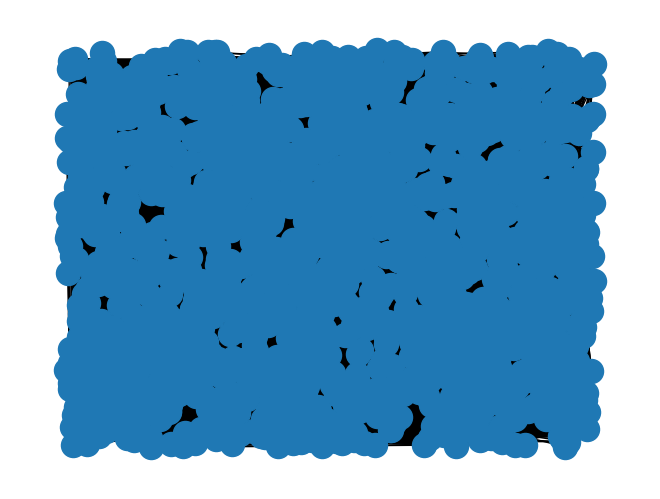

In [66]:
nx.draw(G, pos=nx.random_layout(G))

**Options for layout :**

['arf_layout',
'bfs_layout',
 'bipartite_layout',
 'circular_layout',
 'fruchterman_reingold_layout',
 'kamada_kawai_layout',
 'multipartite_layout',
 'np_random_state',
 'nx',
 'planar_layout',
 'random_layout',
 'rescale_layout',
 'rescale_layout_dict',
 'shell_layout',
 'spectral_layout',
 'spiral_layout',
 'spring_layout']

In [67]:
# Centrality Measures :

def calculate_centrality_measures(G):
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    return degree_centrality, betweenness_centrality, closeness_centrality

In [68]:

from itertools import combinations

# Graph
degree_centrality, betweenness_centrality, closeness_centrality = calculate_centrality_measures(G)
features = []
labels = []
# Calculating features for each pair of nodes:
for node1, node2 in combinations(G.nodes(), 2):

    # Centrality measures for node1 and node2
    degree_centrality_1 = degree_centrality[node1]
    degree_centrality_2 = degree_centrality[node2]
    betweenness_centrality_1 = betweenness_centrality[node1]
    betweenness_centrality_2 = betweenness_centrality[node2]
    closeness_centrality_1 = closeness_centrality[node1]
    closeness_centrality_2 = closeness_centrality[node2]

    # Directly compute and append features
    features.append((
        node1,
        node2,
        len(list(nx.common_neighbors(G, node1, node2))),  # Common Neighbors
        next(nx.preferential_attachment(G, [(node1, node2)]))[2],  # Preferential Attachment
        next(nx.resource_allocation_index(G, [(node1, node2)]))[2],  # Resource Allocation
        next(nx.adamic_adar_index(G, [(node1, node2)]))[2],  # Adamic Adar
        next(nx.jaccard_coefficient(G, [(node1, node2)]))[2] , # Jaccard Coefficient
        (degree_centrality_1 + degree_centrality_2) / 2,
        (betweenness_centrality_1 + betweenness_centrality_2) / 2,
        (closeness_centrality_1 + closeness_centrality_2) / 2
    ))
    # Existence of links between nodes (1 or 0)
    labels.append(1 if G.has_edge(node1, node2) else 0)

# Creating a DataFrame from the features and labels
features_df = pd.DataFrame(features,
                           columns=['node1','node2','Common Neighbors',
                                    'Preferential Attachment', 'Resource Allocation',
                                    'Adamic Adar', 'Jaccard Coefficient', 'Average Degree Centrality',
                                    'Average Betweenness Centrality', 'Average Closeness Centrality'])
features_df['laybel'] = labels
#We record the laybels to further use it to filter features_df with none edges nodes!


In [ ]:
#features_df = pd.read_csv("from index4.0.ipynb.csv")

In [69]:
condition = ( features_df['laybel'] == 0 )
features = features_df[condition]

In [70]:
features.to_csv('output/features-nodes-without-links-from-index4.3.ipynb.csv', index=False,
                   compression = {'method': 'zip', 'compresslevel': 8 } )

In [71]:
features.shape, features_df.shape

((1145336, 11), (1171215, 11))

In [77]:
X = features.drop(['node1', 'node2', 'laybel' ], axis = 1)

In [78]:
import numpy as np

X = np.array(X)

In [79]:
#
predicts_straight = model.predict(X)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    4.0s


In [80]:
#
predicts_probabilities = model.predict_proba(X)[:, 1]

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    7.1s


In [ ]:
#:  بیشترین احتمال کانکتی را در نظر میگیریم

In [81]:
max(predicts_probabilities)

0.9601365257411274

In [ ]:
features.drop('laybel',axis = 1, inplace=True)

In [ ]:
features['predicted laybel'] = predicts_straight
features['probability laybel'] = predicts_probabilities


In [115]:

# Create a boolean mask based on the condition
condition = features['probability laybel'] > 0.96

# Specify the columns you want to keep
columns_to_keep = ['node1', 'node2', 'predicted laybel', 'probability laybel']

# Apply the boolean mask and select only the specified columns to filter the DataFrame
final_predicted = features.loc[condition, columns_to_keep]

# Display the filtered DataFrame
print(final_predicted)


        node1  node2  predicted laybel  probability laybel
96509    6705   3853                 1            0.960105
97974    7919   3853                 1            0.960105
148619   8005   3853                 1            0.960105
154329   6292   3853                 1            0.960105
184044   7095   3853                 1            0.960105
282576   5910   3853                 1            0.960105
291879   6824   3853                 1            0.960105
350514   6444   3853                 1            0.960137
452153   7250   3853                 1            0.960105
503919   6448   3853                 1            0.960137
518843   6490   3853                 1            0.960105
631113   6662   3853                 1            0.960137
643503   6801   3853                 1            0.960105
780068   6549   3853                 1            0.960105
801055   3853   6062                 1            0.960105
801078   3853   6169                 1            0.9601

In [88]:
#final_predicted.to_csv('output/final-predicted-upper85perCent.csv', index=False)

In [116]:
final_predicted.reset_index(inplace=True)

In [117]:
final_predicted_node1 = final_predicted['node1'].to_list()
final_predicted_node2 = final_predicted['node2'].to_list()

In [118]:
for i in range( len( final_predicted_node1) ):
  temp_node1 = final_predicted_node1[i]
  temp_node2 = final_predicted_node2[i]
  if temp_node1 in advertiser_nodes_guide_map['Advertisers-id'].to_list() :
    final_predicted.loc[i, 'node1-name'] = advertiser_nodes_guide_map.loc[ advertiser_nodes_guide_map['Advertisers-id'] == temp_node1, 'Advertisers-name' ].values[0]
  elif temp_node1 in publisher_nodes_guide_map['Publishers-id'].to_list() :
    final_predicted.loc[i, 'node1-name']= publisher_nodes_guide_map.loc[ publisher_nodes_guide_map['Publishers-id'] == temp_node1, 'Publishers-name' ].values[0]
  if temp_node2 in advertiser_nodes_guide_map['Advertisers-id'].to_list() :
    final_predicted.loc[i, 'node2-name'] = advertiser_nodes_guide_map.loc[ advertiser_nodes_guide_map['Advertisers-id'] == temp_node2, 'Advertisers-name' ].values[0]
  elif temp_node2 in publisher_nodes_guide_map['Publishers-id'].to_list() :
    final_predicted.loc[i, 'node2-name'] = publisher_nodes_guide_map.loc[ publisher_nodes_guide_map['Publishers-id'] == temp_node2, 'Publishers-name' ].values[0]

In [119]:
final_predicted

,index,node1,node2,predicted laybel,probability laybel,node1-name,node2-name
0,96509,6705,3853,1,0.960105,p_25734,a_67681
1,97974,7919,3853,1,0.960105,p_66012,a_67681
2,148619,8005,3853,1,0.960105,p_69061,a_67681
3,154329,6292,3853,1,0.960105,p_18822,a_67681
4,184044,7095,3853,1,0.960105,p_34357,a_67681
5,282576,5910,3853,1,0.960105,p_12956,a_67681
6,291879,6824,3853,1,0.960105,p_27411,a_67681
7,350514,6444,3853,1,0.960137,p_219,a_67681
8,452153,7250,3853,1,0.960105,p_40821,a_67681
9,503919,6448,3853,1,0.960137,p_21950,a_67681


In [121]:
final_predicted.to_csv('output/final-predicted-upper96perCent.csv', index=False)

In [105]:
non_same_rows= []
for i in range(final_predicted.shape[0]) :
  if final_predicted.loc[i, 'node1-name'].startswith('a') :
    if final_predicted.loc[i, 'node2-name'].startswith('p') :
      non_same_rows.append(i)
  elif final_predicted.loc[i, 'node1-name'].startswith('p') :
    if final_predicted.loc[i, 'node2-name'].startswith('a') :
      non_same_rows.append(i)


In [106]:
final_predicted_good_rows = final_predicted.iloc[non_same_rows]

In [107]:
final_predicted_good_rows

,index,node1,node2,predicted laybel,probability laybel,node1-name,node2-name
0,43103,6507,3853,1,0.927237,p_22822,a_67681
1,50342,5981,659,1,0.911500,p_13503,a_2144
2,96509,6705,3853,1,0.960105,p_25734,a_67681
3,97974,7919,3853,1,0.960105,p_66012,a_67681
4,135457,6378,659,1,0.911500,p_2074,a_2144
...,...,...,...,...,...,...,...
147,801770,3853,8258,1,0.928881,a_67681,p_76589
148,801810,3853,6450,1,0.960105,a_67681,p_21972
149,801817,3853,6922,1,0.928881,a_67681,p_29579
150,801837,3853,8789,1,0.928881,a_67681,p_93


In [108]:
final_predicted_good_rows.to_csv('output/final-predicted-upper90perCentxx-NoNsame.csv', index=False)

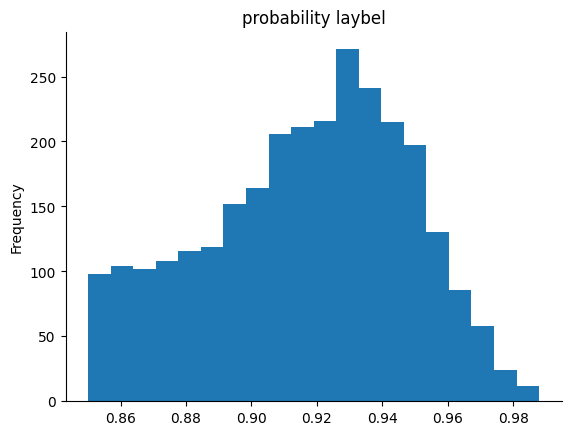

In [ ]:
# @title probability laybel

from matplotlib import pyplot as plt
final_predicted['probability laybel'].plot(kind='hist', bins=20, title='probability laybel')
plt.gca().spines[['top', 'right',]].set_visible(False)

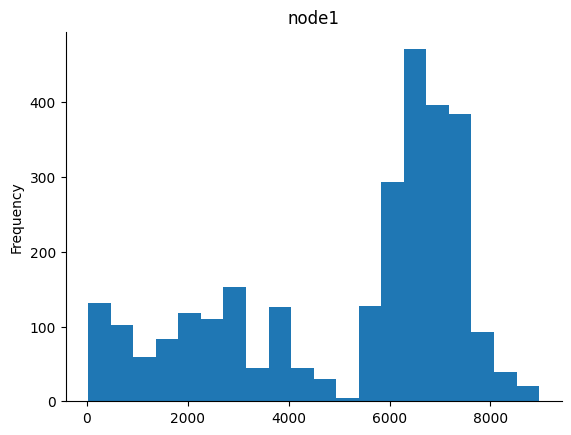

In [ ]:
# @title node1

from matplotlib import pyplot as plt
final_predicted['node1'].plot(kind='hist', bins=20, title='node1')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [74]:
#from google.colab import drive

In [75]:
#drive.mount('/content/new/')

Mounted at /content/new/
Drive already mounted at /content/new/; to attempt to forcibly remount, call drive.mount("/content/new/", force_remount=True).


In [124]:
print( 'Number of Non-Edges nodes pairs Giving the model : ', features.shape[0])

Number of Non-Edges nodes pairs Giving the model :  1145336


In [126]:
features_all_one = features[features['predicted laybel'] == 1]

In [128]:
print( 'Number of possible links predicted from the model : ', features_all_one.shape[0])

Number of possible links predicted from the model :  71819
